<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/12-K-Nearest-Neighbors/00_My_KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - K Nearest Neighbors - Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV

## Data

In [2]:
df = pd.read_csv('/content/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

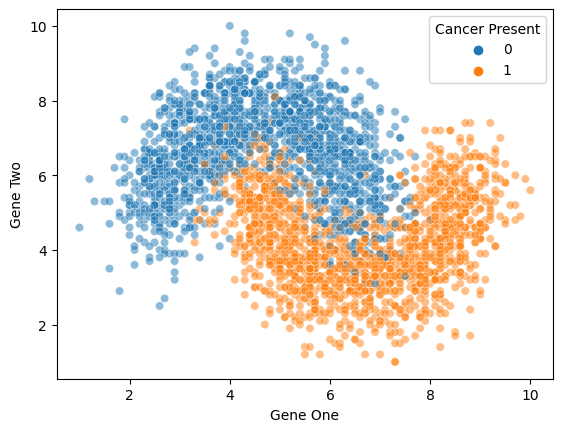

In [3]:
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5)

(4.0, 8.0)

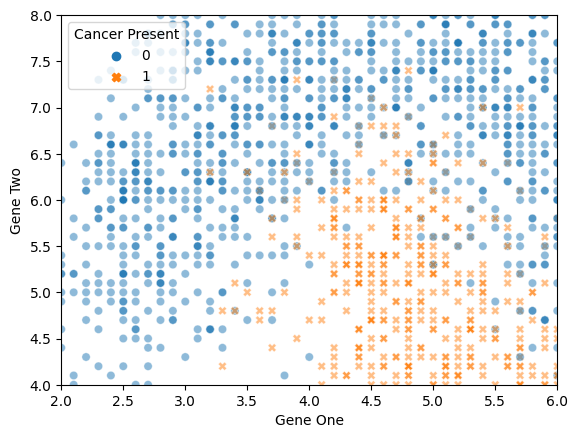

In [4]:
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5, style='Cancer Present')

plt.xlim(2,6)
plt.ylim(4,8)

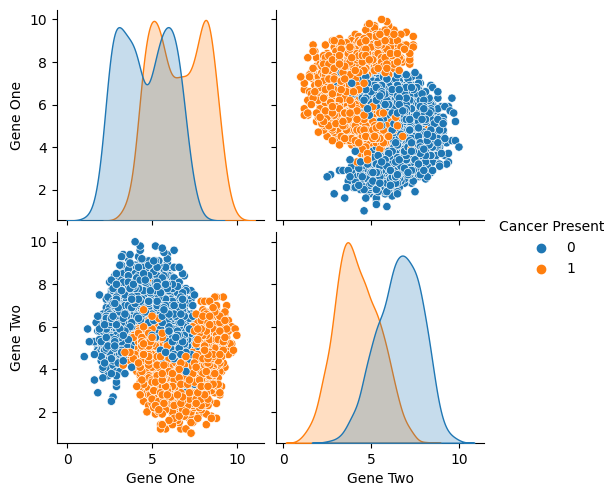

In [5]:
sns.pairplot(df, hue = 'Cancer Present')

## Train | Test Split | Scaling Data and Model Evaluation

In [6]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(scaled_X_train, y_train)
y_pred = knn_model.predict(scaled_X_test)

confusion_matrix(y_test, y_pred)

array([[403,  34],
       [ 29, 434]])

In [7]:
len(y_test)

900

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       437
           1       0.93      0.94      0.93       463

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [9]:
y_train.value_counts()

0    1063
1    1037
Name: Cancer Present, dtype: int64

In [10]:
y_test.value_counts()

1    463
0    437
Name: Cancer Present, dtype: int64

## Elbow Method for Choosing Reasonable K Values

In [11]:
test_error_rates = []

for k in range(1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train, y_train)

  y_pred_test = knn_model.predict(scaled_X_test)

  test_error = 1-accuracy_score(y_test, y_pred_test)

  test_error_rates.append(test_error)

test_error_rates

[0.09333333333333338,
 0.08333333333333337,
 0.07777777777777772,
 0.07666666666666666,
 0.0755555555555556,
 0.06999999999999995,
 0.06999999999999995,
 0.06777777777777783,
 0.0755555555555556,
 0.07222222222222219,
 0.07333333333333336,
 0.06888888888888889,
 0.06999999999999995,
 0.07111111111111112,
 0.06999999999999995,
 0.06999999999999995,
 0.07111111111111112,
 0.06888888888888889,
 0.06777777777777783,
 0.06888888888888889,
 0.06666666666666665,
 0.06888888888888889,
 0.06666666666666665,
 0.06777777777777783,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06888888888888889,
 0.06666666666666665]

Text(0.5, 0, 'K Neighbors')

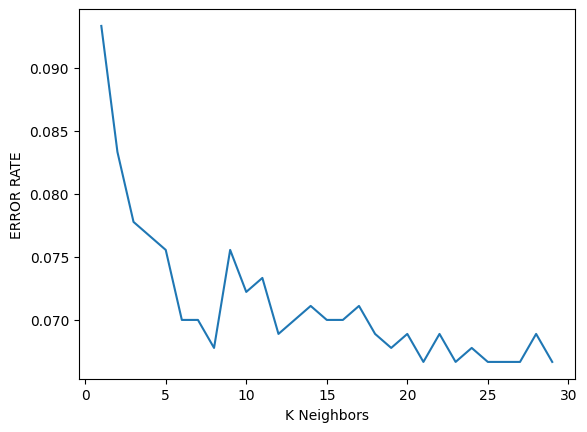

In [12]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

## Full Cross Validation Grid Search for K Value


In [13]:
# PIPELINE --> GRIDSEARCH CV
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [14]:
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors':k_values, }
full_cv_classifier = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=10)

full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [15]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=15))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=15),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [16]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [17]:
full_pred = full_cv_classifier.predict(X_test)
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       437
           1       0.92      0.94      0.93       463

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [18]:
new_patient = [[3.9, 6.5]]
full_cv_classifier.predict(new_patient)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [19]:
full_cv_classifier.predict_proba(new_patient)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.93333333, 0.06666667]])

In [20]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.00723903, 0.00849459, 0.00482745, 0.00474329, 0.00460598,
        0.00456557, 0.00472686, 0.00529671, 0.00553298, 0.00463119,
        0.004667  , 0.00457926, 0.0048033 , 0.00461988, 0.00589888,
        0.00470855, 0.00461929, 0.00458565, 0.00475848]),
 'std_fit_time': array([0.0004738 , 0.00221505, 0.00059578, 0.00043229, 0.00035645,
        0.00012897, 0.00053898, 0.00082617, 0.00115831, 0.00027317,
        0.00052203, 0.00016377, 0.00089097, 0.00044796, 0.00351254,
        0.00021192, 0.00015759, 0.0001274 , 0.00039315]),
 'mean_score_time': array([0.01407278, 0.01352808, 0.00841954, 0.00810251, 0.00825348,
        0.00777771, 0.00824497, 0.00891354, 0.00998225, 0.00807428,
        0.00781186, 0.00870051, 0.00807664, 0.00829756, 0.00990698,
        0.0095001 , 0.00867724, 0.00821011, 0.00875924]),
 'std_score_time': array([0.00244916, 0.00169494, 0.00183412, 0.00132937, 0.00176165,
        0.00017974, 0.00102264, 0.00165189, 0.00336741, 0.00048919,
        

In [21]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [22]:
len(k_values)

19

In [23]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 15}